# Simple FITS file manipulation in Python with astropy.io.fits

Load the fits package from astropy.

Use a helper function to get a remote file.

Open the FITS file and display the information about the first Header Data Unit List.

In [1]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
hdul = fits.open(image_file)
hdul.info()

Filename: /Users/rhamilton/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Display the Header of the FITS file.

In [2]:
hdul[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Set up mpld3 so we can zoom, pan, select images in the notebook.

Import Matplotlib pyplot and a style file from astropy.visualization.

Extract the image data from the FITS head data unit and print its shape.

In [3]:
# Editor's note; I disabled these three lines below
#   for uploading to GitHub because they weren't working for me
#   for some unknown reason....
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
image_data = hdul[0].data
print(image_data.shape)

(893, 891)


Make a pyplot figure and display the image data using default color table.

We set the 'origin' to 'lower' so the 0,0 point will be in the lower left instead of upper left.

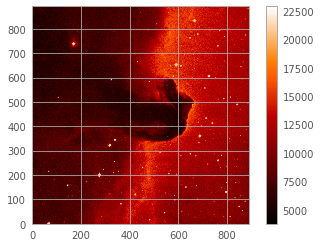

In [4]:
plt.figure()
plt.imshow(image_data, origin='lower')
plt.colorbar()
plt.show()

Change the color map we are using to 'gray'

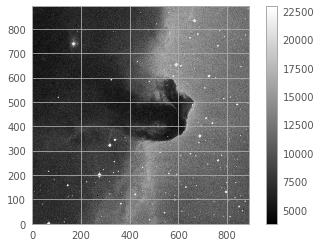

In [5]:
plt.figure()
plt.imshow(image_data, cmap = 'gray', origin='lower')
plt.colorbar()

Print out a few statistics about the image.

In [6]:
import numpy as np
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


Plot a histogram of the image using 100 bins.

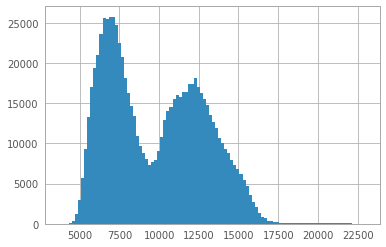

In [7]:
NBINS = 100
histogram = plt.hist(image_data.flatten(), NBINS)

Use "LogNorm" to normalize the data to 0 to 1 using a log scale.

[Text(1,0,'5,000'), Text(1,0,'10,000'), Text(1,0,'20,000')]

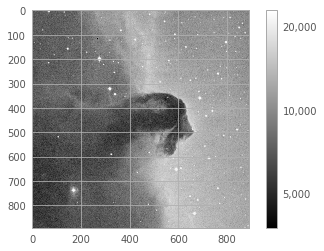

In [8]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

Now, plot the image in a figure with two supplots and plot the 100th column in the second supplot

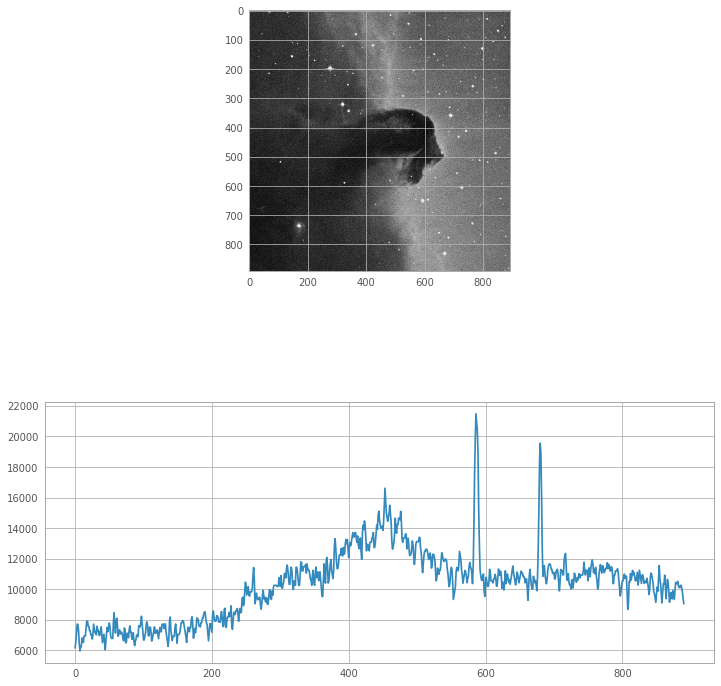

In [9]:
fig1, (ax, ax2) = plt.subplots(2, 1, figsize=(12,12))
ax.imshow(image_data, cmap='gray')

plot_data = image_data[100, :]
x = np.arange(len(plot_data))
ax2.plot(x, plot_data)